# A2 Bias in data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Select and Download Datasets

### Toxicity Dataset

The documentation and data files available are [wikimedia](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Toxicity) and [figshare](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973).

In [22]:
# TOXICITY ANNOTATIONS
toxicity_ann = pd.read_csv('Toxicity/toxicity_annotations.tsv', sep = '\t')

# TOXICITY ANNOTATED COMMENTS
toxicity_com = pd.read_csv('Toxicity/toxicity_annotated_comments.tsv', sep = '\t')

# TOXICITY WORKER DEMOGRAPHICS
toxicity_dem = pd.read_csv('Toxicity/toxicity_worker_demographics.tsv', sep = '\t')

In [132]:
display(toxicity_ann)
# type(toxicity_ann.toxicity_score[0])

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0
...,...,...,...,...
1598284,699897151.0,1550,0,0.0
1598285,699897151.0,1025,0,1.0
1598286,699897151.0,648,0,1.0
1598287,699897151.0,379,0,0.0


numpy.float64

In [92]:
display(toxicity_com)

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test
...,...,...,...,...,...,...,...
159681,699848324.0,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
159682,699851288.0,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
159683,699857133.0,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,dev
159684,699891012.0,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,train


In [93]:
display(toxicity_dem)

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters
...,...,...,...,...,...
3586,3189,female,0,18-30,bachelors
3587,1105,female,0,18-30,bachelors
3588,2192,female,1,Under 18,hs
3589,2692,female,0,30-45,hs


We need to merge the three tables to get full data. "rev_id" is stored as a float and needed to be changed to integer. 

In [26]:
toxicity_worker = pd.merge(toxicity_ann, toxicity_dem, on='worker_id')
toxicity_worker.rev_id = toxicity_worker.rev_id.astype('int')

toxicity_merged = pd.merge(toxicity_worker, toxicity_com, on='rev_id')
toxicity_merged.rev_id = toxicity_merged.rev_id.astype('int')
toxicity_merged

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,comment,year,logged_in,ns,sample,split
0,2232,723,0,0.0,female,0,30-45,bachelors,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,2232,4000,0,0.0,male,1,18-30,hs,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
2,2232,3989,0,1.0,female,0,18-30,bachelors,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
3,2232,1574,0,1.0,female,0,30-45,bachelors,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
4,2232,1508,0,1.0,female,1,45-60,hs,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346950,402813611,1244,0,0.0,female,1,18-30,bachelors,NEWLINE_TOKENNEWLINE_TOKENGreat! Wonderful. It...,2010,True,user,blocked,dev
1346951,402813611,4124,0,1.0,male,0,18-30,bachelors,NEWLINE_TOKENNEWLINE_TOKENGreat! Wonderful. It...,2010,True,user,blocked,dev
1346952,654071026,1207,0,0.0,female,0,30-45,hs,"NEWLINE_TOKENNEWLINE_TOKENJohar, Surinder Sing...",2015,True,article,blocked,test
1346953,654071026,3512,0,1.0,female,0,18-30,bachelors,"NEWLINE_TOKENNEWLINE_TOKENJohar, Surinder Sing...",2015,True,article,blocked,test


### Personal Attacks Dataset

The documentation and data files available are [wikimedia](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Personal_Attacks) and [figshare](https://figshare.com/articles/Wikipedia_Talk_Labels_Personal_Attacks/4054689).

In [97]:
# ATTACK ANNOTATIONS
attack_ann = pd.read_csv('Attack/attack_annotations.tsv', sep = '\t')

# ATTACK ANNOTATED COMMENTS
attack_com = pd.read_csv('Attack/attack_annotated_comments.tsv', sep = '\t')

# ATTACK WORKER DEMOGRAPHICS
attack_dem = pd.read_csv('Attack/attack_worker_demographics.tsv', sep = '\t')

In [98]:
display(attack_ann)
display(attack_com)
display(attack_dem)

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1365212,699897151,628,0.0,0.0,0.0,0.0,0.0
1365213,699897151,15,0.0,0.0,0.0,0.0,0.0
1365214,699897151,57,0.0,0.0,0.0,0.0,0.0
1365215,699897151,1815,0.0,0.0,0.0,0.0,0.0


,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train
...,...,...,...,...,...,...,...
115859,699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
115860,699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
115861,699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train
115862,699891012,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,dev


,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs
...,...,...,...,...,...
2185,1442,male,0,18-30,hs
2186,529,female,0,30-45,hs
2187,2036,female,0,18-30,masters
2188,393,female,0,18-30,masters


In [100]:
attack_worker = pd.merge(attack_ann, attack_dem, on='worker_id')
attack_worker.rev_id = attack_worker.rev_id.astype('int')

attack_merged = pd.merge(attack_worker, attack_com, on='rev_id')
attack_merged.rev_id = attack_merged.rev_id.astype('int')
attack_worker

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,gender,english_first_language,age_group,education
0,37675,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
...,...,...,...,...,...,...,...,...,...,...,...
855509,281960519,3964,0.0,0.0,1.0,0.0,1.0,male,0,Under 18,some
855510,289741535,3964,0.0,0.0,1.0,0.0,1.0,male,0,Under 18,some
855511,392852210,3964,0.0,0.0,0.0,0.0,0.0,male,0,Under 18,some
855512,538094319,3964,0.0,0.0,0.0,0.0,0.0,male,0,Under 18,some


## Step 2: Perform Analysis

1. Analyze the demographic information about the Crowdflower workers that is available in the toxicity dataset.

In [89]:
'''
This function prints the input dataframe and create a bar chart with percentages annotated above each bar. 
'''
def barplot(df, title):
    # print()
    total = df.values.sum()
    display(df)
    ax = df.plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/total*100, 2))+'%', xy=(p.get_x()+0.25, p.get_height()),  ha='center', va='center')
    # df.plot.bar()
    plt.title(title)
    # plt.legend()
    plt.show()

Plot number of labellers by gender, age group, education level and languages.

male      2327
female    1263
other        1
Name: gender, dtype: int64

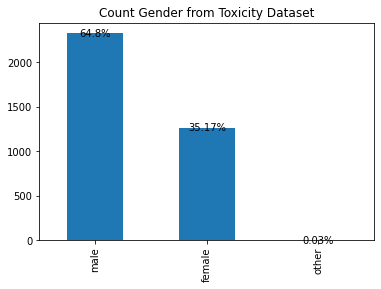

18-30       1862
30-45       1247
45-60        296
Under 18      79
Over 60       30
Name: age_group, dtype: int64

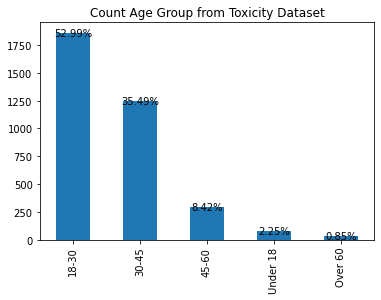

bachelors       1441
hs              1026
masters          546
professional     441
some              93
doctorate         41
none               3
Name: education, dtype: int64

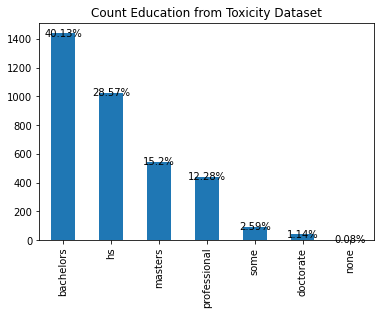

0    2925
1     666
Name: english_first_language, dtype: int64

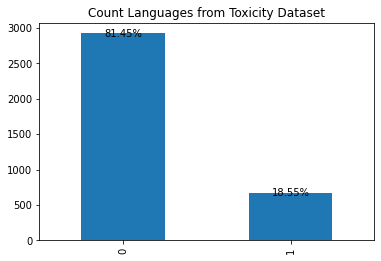

In [150]:
dataset = ' from Toxicity Dataset'
barplot(toxicity_dem.gender.value_counts(), 'Count Gender'+dataset)
barplot(toxicity_dem.age_group.value_counts(), 'Count Age Group'+dataset)
barplot(toxicity_dem.education.value_counts(), 'Count Education'+dataset)
barplot(toxicity_dem.english_first_language.value_counts(), 'Count Languages'+dataset)
# toxicity_worker.age_group.value_counts().plot.bar()

From the bar charts above, we can see that the distribution of worker demographics is very unbalanced in the following four aspects. 

- Age

    The vast majority of the data was labelled by people ages 18 - 45. Different generations have different lived experiences which could affect their decision in what constitutes a toxic comment. The data is biased because there is less representation for people who are older than 45 or younger than 18. 

- Gender

    There are about twice as many male workers as female labellers and there is almost no information about non-binary people. The data is not inclusive and does not represent the actual population demographics in the US. The misrepresentation of the population can add bias because men, women, and non-binary people can have different experiences because of their gender identity. People with different gender identity may have differnt labelling behavior.

- Education 

    Over half of the labellers have bachlor's degree but there is little information about those who have lower than high school and doctorate's degree. Besides, the definition of "some" education is not clear for me, so it may also confuse the labellers while classifying themselves.  

- Languages
 
    Similar to all the problems listed above, the number of English native speakers are over 4 times compared to those whose first language are not English in this sample. The data considers all the non-English languages as one big group but there are many languages that have various cultural contexts such as Chinese and French. 



2. Analyze the demographic information about the Crowdflower workers that is available in the personal attack dataset and compare the results with those from the toxicity dataset.

male      1349
female     840
other        1
Name: gender, dtype: int64

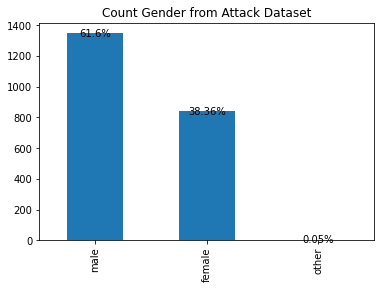

18-30       1049
30-45        831
45-60        218
Under 18      37
Over 60       20
Name: age_group, dtype: int64

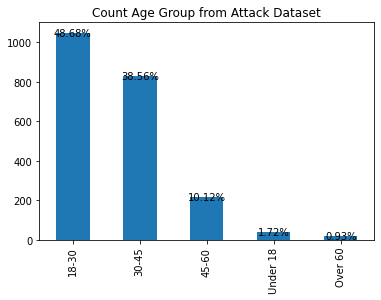

bachelors       862
hs              631
masters         385
professional    243
some             48
doctorate        20
none              1
Name: education, dtype: int64

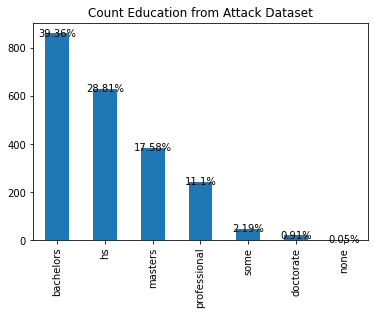

0    1788
1     402
Name: english_first_language, dtype: int64

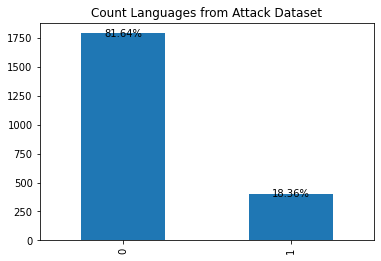

In [151]:
dataset = ' from Attack Dataset'
barplot(attack_dem.gender.value_counts(), 'Count Gender'+dataset)
barplot(attack_dem.age_group.value_counts(), 'Count Age Group'+dataset)
barplot(attack_dem.education.value_counts(), 'Count Education'+dataset)
barplot(attack_dem.english_first_language.value_counts(), 'Count Languages'+dataset)

From the summary charts of worker demographics in personal attacks dataset above, the numbers are slightly different between the demographics between the toxicity and attack dataset but they share almost the same gernal trend.  

3. Analyze and compare the relationship between gender and the toxicity score/attack score for the two datasets.

In [154]:
tox_pivot = pd.pivot_table(toxicity_worker, values='toxicity_score', index=['gender', 'age_group'])
display(tox_pivot)

att_pivot = pd.pivot_table(attack_worker, values='attack', index=['gender'])
display(att_pivot)

toxicity_score
gender age_group                
female 18-30            0.138991
       30-45            0.235839
       45-60            0.198393
       Over 60          0.120963
       Under 18         0.139047
male   18-30            0.221218
       30-45            0.234471
       45-60            0.235900
       Over 60          0.305645
       Under 18         0.301305
other  Under 18         0.553073

,attack
gender,
female,0.173598
male,0.158691
other,0.445783


## Step 3: Further Implications

All the demo applications discussed below are listed in the “[Perspective Hacks](https://github.com/conversationai/perspectiveapi/wiki/perspective-hacks)” gallery.

1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

    I expect models trained on the Wikipedia Talk corpus to perform well in WikiDetox application, which is to visualize toxic comments on Wikipedia. The context information would be similar, both the comments from toxicity dataset and those used for this application are from Wikimedia. The Perspective API is highly related to the information that this app wants to show to the Wikipedians.
    
2. Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

    Hot Topics is an example that I don't think the Perspective API would work well in. The description of this application mentions that it uses a data set of toxicity per category to compute the average toxicity score for an article. However, the raw data from the Wikipedia Talk corpus does not classify the comments, so I concern the relavance of their categories and toxicity. Besides, the application will be used on any articles, the toxicity score for articles that are not related to Wikipedia comments might not be accurate. 

3. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

    Hostile speech in non-English languages would be hard to accurately detect using models trained on the Perspective API where all the comments are in English. In addition, the detection of toxic recent social media posts could also be a huge challenge for the following two reasons. The comment dates are from 2002 to 2016 but the trending words on the Internet changes so fast that data from the Perspective API may be outdated in this case. The comments are from Wikipedia user page and article page, which may not be representitive enough for social media posts. 
